Table of Contents

Preface



1 – Look at the Big Picture

2 – Business Constraints

3 – Dataset Backround

4 – Literature Review

6 – Get the Data

7 – Discover & Visualize the Data to gain Insights

8- Select & Train our Models

9 – Fine Tune Our Model

10- Present Our Model

11- Conclusion

12 - References

In [1]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}..Available at: {url} [Accesed] {access_date}]'
    return citation

In [3]:
# Example usage
author = "Rithwik Shetty"
year = "2021"
title =' Predicting a Failure in Scania’s Air Pressure System'
url = "https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038"
access_date = "27-10-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Rithwik Shetty,2021. Predicting a Failure in Scania’s Air Pressure System..Available at: https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 27-10-2023]


# The Big Picture

We have been tasked by a haulage company to analyse a dataset collected from their scania truck fleet which are used daily. They advise that it is essential to reduce maintance costs as a result breakdowns during daily operations. They advise us some of these breakdowns are  due to the failure of the air pressure system. They have asked by using Data Analytics can we use the dataset to reduce these costs.

WE advise that it may be possible to build a predictive model that may help in identfying the compontents that are and are not linked to the breakdown of the air pressure system. This may help them to arrange maintance schedules to insure the optium functioning of their fleet.

The air pressure system in heavy duty trucks use  compressed air to drive the pistons which use the brake pads to slow down the vechicle. The advantage of this system over a  hydraulic system is that is easyily available and cost effective. However we need to be mindful that as a result of our analysis this may extend or reduce the service intervals for these trucks. There have been instances were failures of air pressure systems have led to human fatalies as a result the cost of misclassification is high. As our EDA will ultimatley lead to a machine learing predictive model being produced it is something we need to be aware off. 

# Machine Learning Formation

This is a binary classification problem. We are presented with two classes postive & negative. The postive class us that the failure was due to a specific component of the APS system, the negative class informs us that the failure has to do with other compnents within the truck. There we would propose that it may be possible to build a machine learning model that when given a  new data point(sensor information) wherther the failure was due to the trucks APS or not
Rithwik Shetty,2021. Predicting a Failure in Scania’s Air Pressure System.[Online Course] .Available at: https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

# Business Constraints

Latency the time taken to detect a failure in the APS system must be low to avoid an increase in maintenance costs.

We need to consider how we clasify our results. If we build a model which clasifys our data incorrectly this could lead to the breakdown of a truck leading to increase maintance costs 

# Datset Backround

There are over 60.000 datapoints and 171 features within our Dataset. This then can be classed as a high dimensional dataset. This could lead to the curse of dimensionality which may cause problems. in a high dimensional space such as our dataset the concept of distance between data points become less meaningful. It is difficult to find a pattern in the data due to the amount of features.The model starts capturing noise with the data rather than the pattern within the data. One tool to deal with promlem is Princpial Component Analysis (PCA) this tool allows to reduce the features to lower dimensional space thereby allowing us to identify patterns within our data.

While we will use PCA to reduce out features it may not be the optimal solution for our problem. The dataset contains over 170 features which give us rearings from components within the truck, some measurements relate to the APS system, some do not. Our model needs to identify which components are likely to fail. Here we run into no free lunch theorom PCA will allow us to reduce our features but we lose the ability to interpret which components are related to the breaakdown of the APS brake system. 

Another problem we need to be aware is there ia a lot of missing data. This data is classified as missing completally at random(MCAR) as there is no relationship with the missing data point oan other date within the dataset we will suitable imputation methods to resolve this.

We also have an imbalanced class feature  over 59,000 data points relate to the negative class. This could mean our model could guess and end up with a 90% accurracy but would not work well with new data. We will use a smote method to balance our class features.


# Literature Review

Cerqueira, Vítor, et al. “Combining Boosted Trees with Metafeature Engineering for Predictive Maintenance.” International Symposium on Intelligent Data Analysis. Springer, Cham, 2016.

This paper mentions that the authors’ approach to this problem consists of 4 steps. (i) A filter that excludes a subset of features and data points based on the number of missing values; (ii) A metafeature engineering procedure used to create new features based on existing information; (iii) a biased sampling method to deal with class imbalance problem (SMOTE); and (iv) use of boosted trees for classification.

Features having a high percentage of missing values were removed. During their analysis, they found that some features had an extremity of 80% data missing, and 8 out of 170 features had more than 50% missing values. After removing the said features, it was seen that there were duplicate data points, indicating that the removed features have a little effect in getting a good score.

They mentioned that they are treating the problem as an Anomaly Detection problem since the positive class of the data are characterized by rare events in the domain. They used BoxPlot Analysis (for each feature, compare each value to the typical value found in that feature), Local Outlier Factor (compare data point to it’s local neighborhood through density estimation) and Hierarchical Agglomerative Clustering (each step merges two similar group, and the last observation that are merged might be an outlier) for their metafeature engineering.

SMOTE is a method of duplicating the data points of the minority class of the imbalanced dataset, to balance it out. The use of SMOTE + MetaFeature Engineering with XGBOOST library was seen to give the best result.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

Costa, Camila Ferreira, and Mario A. Nascimento. “IDA 2016 Industrial Challenge: Using Machine Learning for Predicting Failures.” International Symposium on Intelligent Data Analysis. Springer, Cham, 2016.

The authors tried different algorithms, namely, Logistic Regression, K-NN, SVM, Decision Trees and Random Forests to solve the problem. They handled the missing data by implementing the Soft-Impute Algorithm. It is a large scale matrix completion algorithm that replaces missing values with current guesses and solves an optimization problem. The imbalance data was handled by setting a high threshold (cut-off) value, meaning the model will predict a negative class only if it is extremely sure.

The final result showed that Random Forest performed the best, giving a Total Cost (given metric) that was 92.56% lesser than their baseline model. The KNN model was the second best classifier with 90.84% improvement, and the Logistic Regression model worked well with 88.72% improvement. The SVM with RBF Kernel improved the total cost by just 86.36%.

This paper compares the performance of different models, on data whose missing values were imputed using more complex algorithms rather than simple mean/median. We see that Ensemble models will work well to tackle this problem, and a high threshold value plays a key role in handling imbalanced data.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]



# Performance Metrics

For this project, our performance statistic of choice will be the Macro-F1 Score. The F1 scores for each class are factored into the macro F1 score. It might be useful in demonstrating to us how well our model performs depending on the quantity of correctly identified points for each class. This is helpful because misclassification can be highly costly because an undetected APS breakdown can cause the truck to malfunction while in service and raise maintenance expenses.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

# Get The Data

In [4]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklear.impute import IterativeImputer
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore') 


C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
# Read the dataset
train = pd.read_csv('aps_failure_set.csv',na_values=["na"])

# Show first 5 records
train.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,NaN,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,neg,39308,NaN,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,neg,14,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,neg,0,2.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.shape

(60000, 171)

In [7]:
train.describe(include='all')




,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


In [8]:
print("Total number of Train datapoints: ",train.shape[0])
print("Total number of features: ",train.shape[1])

print("The column/feature names given are:\n ",list(train.columns))

Total number of Train datapoints:  60000
Total number of features:  171
The column/feature names given are:
  ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'c

Observation- We know from these fetures have been 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


Observation - we can see from our descriptive stats there are a number of issuses. With 60,000 attribures and 171 features we have a high dimensional dataset. We can a high amount of missing values which need to be dealt with prior to machine learning

# Discover & Visualize Data to Gain Insights

In [10]:
constant_features=[col for col in train.columns if train[col].nunique()==1]
train.drop(columns=constant_features, inplace=True)
train.shape

(60000, 170)

Observation we have used the function to remove single value features as these are features with the values are not useful to us. We can see we have reduce our featues by 11 columns.

In [11]:
def get_correct_label(y):
    """
    This function converts the class labels
    from 'neg' and 'pos' to 0 and 1 respectively
    """
    return y.replace(['neg', 'pos'], [0, 1])

print(train['class'].unique())  # Print unique values in the 'class' column
train['class'] = get_correct_label(train['class'])
print(train['class'].unique())  # Print unique values in the 'class' column after conversion


['neg' 'pos']
[0 1]


In [12]:
def get_correct_label(y):
    """
    This function converts the class labels
    from 'neg' and 'pos' to 0 and 1 respectively
    """
    return y.replace(['neg','pos'],[0,1])

print(train['class'].unique())
train['class'] = get_correct_label(train['class'])
print(train['class'].unique())

[0 1]
[0 1]


In [13]:
train['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

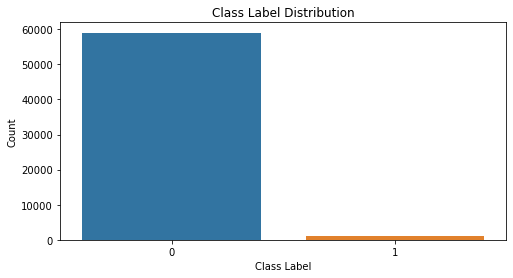

The number of positive class points is:  1000
The number of negative class points is:  59000


In [14]:
plt.figure(figsize=(8,4))
sns.barplot(train['class'].unique(),train['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',train['class'].value_counts()[1])
print('The number of negative class points is: ',train['class'].value_counts()[0])

Observation- we can observe we have an unbalanced class labels. We can deal with this in different we can use an undersampling, oversampling methods. we could use Smote to syntically increas our postive class. Another method we can use is to increase out thesholds to insure the model will only select a negative class if is sure it is only negative.

# Handling Misssing Values

we have previously observed a high degree amount of missingness in our data.We have a number of options open to us, we could drop the missing data.impute with the mean or use knn nearest neighbours to deal with our missing data.

In [15]:
# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:(v / train.shape[0])*100 for k,v in train.isna().sum().items()}
# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

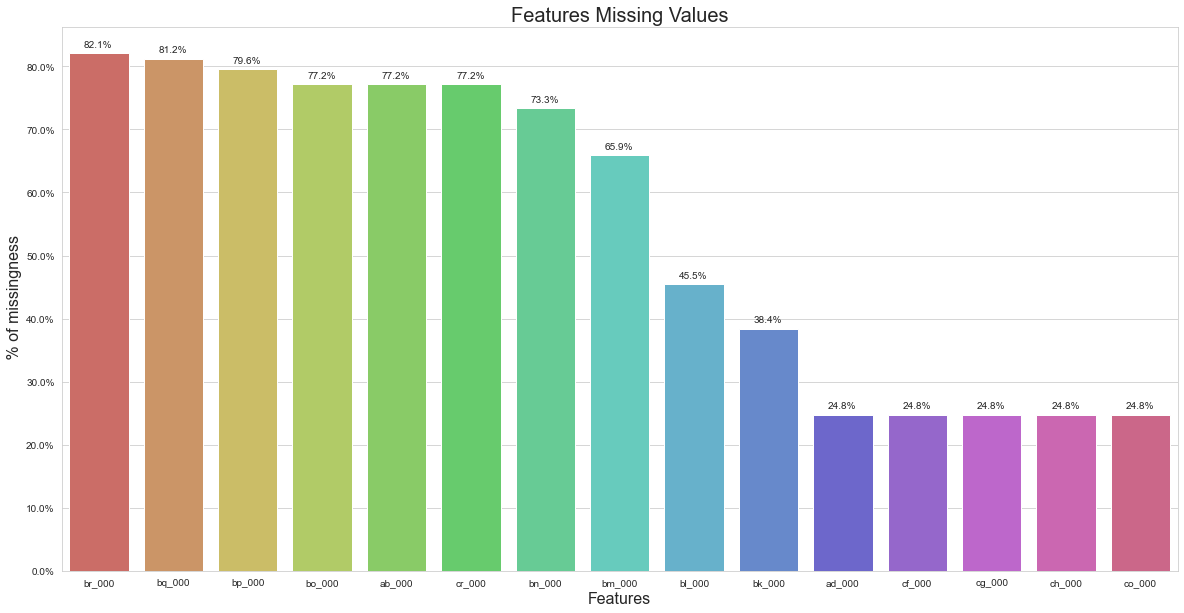

In [16]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.title('Features Missing Values',fontsize=20)
plt.ylabel(" % of missingness", fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.show()

Rithwik Shetty,2021. Predicting a Failure in Scania’s Air Pressure System..Available at: https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 27-10-2023]

Observation We can see from the above graph that are features over 50% missing values we will need to deal them before we to our machine model

In [17]:
def remove_na(train,nan_feat_threshold=0.05,col_threshold=0.7):
    nan_count=train.isna().mean()
    nan_feat=nan_count[nan_count < nan_feat_threshold].index
    train=train.dropna(subset=nan_feat)
    train=train.dropna(axis=1, thresh=col_threshold * train.shape[0])
    train=train.reset_index(drop=True)
    return train

cleaned_df=remove_na(train,nan_feat_threshold= 0.05, col_threshold=0.7)



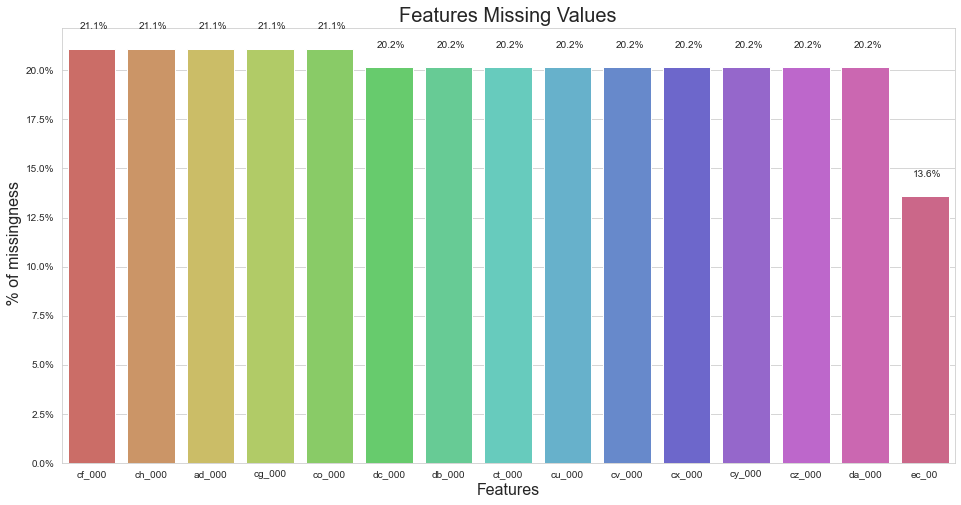

In [18]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
nan_count_cleaned=cleaned_df.isna().mean()* 100
top_nan_count_cleaned= nan_count_cleaned.sort_values(ascending=False).head(15)

sns.set_style(style="whitegrid")
plt.figure(figsize=(16,8))

# Bar Plot
plot = sns.barplot(x=top_nan_count_cleaned.index, y=top_nan_count_cleaned.values,palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.title('Features Missing Values',fontsize=20)
plt.ylabel(" % of missingness", fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.show()

Observation we have removed fetures with over 70% missing values and under 5% missing values. The reaso for this if a feature has over 70% of data issing it is not any good to us and if data has only 5% data it will be difficult for any imputation to work. We will impute the rest of the missing data using k nearest neighbours prior to implenting PCA.

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import numpy as np

def imputation(train, mis_col):
    """
    This function imputes Missing values 
    using Median on given features, and
    Model-Based Imputation on the rest
    """
    
    # Using sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN, strategy='median', copy=True)
    median_df = median_imputer.fit_transform(train[mis_col])
    train1 = train.copy()
    train1[mis_col] = median_df

    # Performing Model-Based Imputation
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0), random_state=0)
    imputed_df = pd.DataFrame(data=mice_imputer.fit_transform(train), columns=train1.columns)

    return imputed_df, median_imputer, mice_imputer

# List of feature names that have missing values between 5% to 15%.
# We will impute the missing values in features with their median
median_imputed_features = [k for k, v in nan_count.items() if v >= 5 and v < 15]

# Example usage of the imputation function:
# imputed_train, median_imputer, mice_imputer = imputation(train, median_imputed_features)

imputed_train, median_imputer, mice_imputer = imputation(train, median_imputed_features)

# Print the first few rows of the imputed DataFrame to inspect the data
print(imputed_train.head())

# To see summary statistics of the DataFrame, you can use the describe() method
print(imputed_train.describe())

   class   aa_000     ab_000        ac_000         ad_000  ae_000  af_000  \
0    0.0  76698.0  13.273626  2.130706e+09     280.000000     0.0     0.0   
1    0.0  33058.0  29.447863  0.000000e+00  191777.195723     0.0     0.0   
2    0.0  41040.0   2.733367  2.280000e+02     100.000000     0.0     0.0   
3    0.0     12.0   0.000000  7.000000e+01      66.000000     0.0    10.0   
4    0.0  60874.0  -5.774479  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   7322

In [20]:
imputed_train.shape

(60000, 170)

In [21]:
missing_counts=imputed_train.isnull().sum()
print(missing_counts)

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64


In [22]:
imputed_train.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,13.273626,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,29.447863,0.000000e+00,191777.195723,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.733367,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,-5.774479,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
train=imputed_train

In [46]:
def top_important_features(imputed_train, labels, top_x=15, verbose=10):
    '''
        This function uses random forests to get feature importances of the features and returns top_x important features
        and their feature importances.
        Returns:
            tuple of (features, importances).
    '''
    # training a random forest
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=verbose, random_state=42)
    rf.fit(train, labels)
    
    # get the feature importances
    feat_imp = rf.feature_importances_
    imp_ind = np.argsort(feat_imp)[::-1] # getting the indices in decreasing order of importance
    top15_ft = train.columns[imp_ind][:15]
    top15_imp = feat_imp[imp_ind][:15]
    
    return(top15_ft, top15_imp)



In [47]:
def univariate_analysis(features):
    """
        This function takes a list of features and performs univariate analysis on them by plotting CDF, PDF, Boxplots and 
        printing mean, standard deviation and median for that feature.
    """
    for ft in features:
        print('---UNIVARIATE ANALYSIS OF', ft, '---')
        values = train_eda[ft]
        values0 = train_eda[train['class']=='neg'][ft]
        values1 = train_eda[train['class']=='pos'][ft]
        desc_neg = values0.describe() # for printing the mean and standard deviation values of the feature for individual classes
        desc_pos = values1.describe()
        print("FOR NEGATIVE CLASS:- 1. Mean:", round(desc_neg['mean'], 3), '2. Standard Deviation:', round(desc_neg['std'], 3), '3. Median:', round(desc_neg['50%'], 3))
        print("FOR POSITIVE CLASS:- 1. Mean:", round(desc_pos['mean'], 3), '2. Standard Deviation:', round(desc_pos['std'], 3), '3. Median:', round(desc_pos['50%'], 3))
# plots
        fig, ax = plt.subplots(ncols=3, figsize=(18,6))
        sns.kdeplot(values0, ax=ax[0], shade=True, label='Neg')
        sns.kdeplot(values1, ax=ax[0], shade=True, label='Pos')
        sns.kdeplot(values0, ax=ax[1], cumulative=True, label='Neg')
        sns.kdeplot(values1, ax=ax[1], cumulative=True, label='Pos')
        sns.boxplot(data=train, x=Y, y=ft, ax=ax[2])
        ax[0].set_title('PDF of '+ft+' for Class 0')
        ax[1].set_title('CDF of '+ft)
        ax[2].set_title('Boxplot of '+ft)
        ax[0].legend()
        ax[1].legend()
        plt.show()
        print('-'*100)

In [51]:
top15_ft, top_15_imp = top_important_features(train,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.9s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.5s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   17.6s



building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.0s


building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   25.1s


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   30.0s


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.4s finished


In [52]:
print('The 15 most important features are:', *top15_ft, sep=', ')

The 15 most important features are:, class, bj_000, ag_002, aa_000, aq_000, dn_000, bu_000, bb_000, ee_005, ci_000, ap_000, bt_000, ag_003, ag_001, am_0


In [56]:
univariate_analysis(top15_ft)

---UNIVARIATE ANALYSIS OF class ---


NameError: name 'train_eda' is not defined

# Prepare The Data For Machine Learning

In [ ]:
from sklearn.impute import KNNImputer
scaler=StandardScaler()
X_std = StandardScaler().fit_transform(train.drop(columns=["class"]))
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_std=imputer.fit_transform(X_std)
pca=PCA(n_components=4)
vecs=pca.fit_transform(X_std)
reduced_df=pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3',
                                            'Principal Component 4'])
final_df= pd.concat([reduced_df,train[['class']]],axis=1)
final_df

unknown,unknown. Imputation of missing values.[Online Course] .Available at: https://scikit-learn.org/stable/modules/impute.html [Accesed] 26-10-2023]

In [ ]:
pca= PCA()
pca.fit(X_std)
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(range(1,len(explained_variance)+ 1),explained_variance,marker='o',linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6)) # set the size of the canvas
targets = list(set(final_df['class'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = final_df['class'] == target
     plt.scatter(final_df.loc[idx, 'Principal Component 1'], final_df.loc[idx, 'Principal Component 2'], c=color, s=50)

# finally, we show the graph
plt.legend(targets, title="Class", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Scania Dataset')
plt.show()

In [ ]:
from sklearn.datasets import load_wine
# load the dataset
wine = load_wine()

# convert the object in a pandas dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target
# normalize data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df.drop(columns=["target"]))
# PCA object specifying the number of principal components desired
pca = PCA(n_components=2) # we want to project two dimensions so that we can visualize them!

# We fit the PCA model on standardized data
vecs = pca.fit_transform(X_std)
reduced_df = pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([reduced_df, df[['target']]], axis=1)

plt.figure(figsize=(8, 6)) # set the size of the canvas
targets = list(set(final_df['target'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = final_df['target'] == target
     plt.scatter(final_df.loc[idx, 'Principal Component 1'], final_df.loc[idx, 'Principal Component 2'], c=color, s=50)

    # finally, we show the graph
plt.legend(targets, title="Target", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.show()


In [ ]:
fig= plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")

targets= list(set(final_df['class']))
colors=['b','r','g']


for target, color in zip(targets,colors):
    idx=final_df['class'] ==target
    ax.scatter(final_df.loc[idx,'Principal Component 1'], final_df.loc[idx,'Principal Component 2'],final_df.loc[idx,'Principal Component 3'],c=color, s =50, label=f'class{target}')
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA on Scania Dataset')

ax.legend(title='Class',loc='upper right')

plt.show()

# Prepare Youe Model

In [ ]:
scania_array = final_df.values

In [ ]:
from sklearn.model_selection import train_test_split
X = scania_array[:,0:4]
y = scania_array[:,4]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma="auto")))
models.append((GradientBoostingClassifier()))
models.append(('AB',AdaBoostClassifier()))

In [ ]:


models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM' , SVC(gamma="auto")))
models.append(('GB',GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison Accurracy')
pyplot.show()

In [ ]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison F1_ Macro')
pyplot.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [ ]:
f1_macro_score=f1_score(y_validation,predictions,average='macro')
confusion_mat=confusion_matrix(y_validation,predictions)

print(' F1 macro Score is:',f1_macro_score)
print(confusion_mat)


In [ ]:
accuracy=accuracy_score(y_validation,predictions)
print('Accuracy:',accuracy)

confusion=confusion_matrix(y_validation,predictions)
print('confusion_matrix:\n',confusion)
                               
f1_macro_score=f1_score(y_validation,predictions,average='macro')
recall=recall_score(y_validation,predictions,average='macro')
precision=precision_score(y_validation,predictions,average='macro')
                               
print('Precision is:',precision)
print('Recall is:',recall)
print('F1- score is:',f1_macro_score)

# Fine Tune Your Model

# Conclusion

# Bibliography